# 1. Download the CIFAR10 dataset    

Using TensorFlow backend.


170500096/170498071 [==============================] - 12s 0us/step


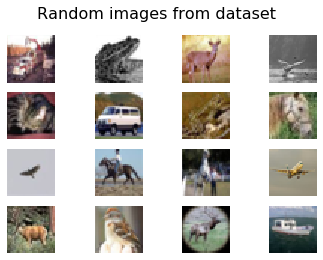

X training-set shape :  (50000, 32, 32, 3) 
X test-set     shape :  (10000, 32, 32, 3)


In [1]:
# -------------------------------------------------------------- #
#                                                                #
#                   Hw_4 - Introduction to CNN                   #
#                Daniel Engelsman   &   Chen Katz                #
#                                                                #
# -------------------------------------------------------------- #

import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() # upload data
img_size = X_train[1, :, :].shape[0]**2                    # image resolution

# Plot several images for intuition (!)
i,j = 0,0
n_rows, n_cols = 4,4
fig, ax_arr = plt.subplots(n_rows, n_cols)
for idx in np.random.choice(X_train.shape[0],n_rows*n_cols):
  ax_arr[i,j].imshow( X_train[idx,:,:] )
  ax_arr[i,j].axis('off')
  j += 1
  if j==n_cols:
    i+= 1
    j=0
fig.suptitle('Random images from dataset', fontsize=16)
plt.show()

print('X training-set shape : ', X_train.shape, '\nX test-set     shape : ', X_test.shape )

# 2. Normalize the data such that : $-0.5 \ \leq X_{train}, \ X_{test} \leq \ 0.5 \in $ $\, \mathbb{R}^{n \, \times \, dim}$

In [0]:
# def rgb2gray( in_Data ):
#   np.dot( in_Data[..., :3], [0.2989, 0.5870, 0.1140])

def preprocessing( X_train, X_test, y_train, y_test, rgb_2_gray ):
  # convert RGB to grayscale and VECTORIZE (!)
  if rgb_2_gray == 1:
    X_train = np.dot( X_train[..., :3], [0.2989, 0.5870, 0.1140] ).reshape(-1, img_size)
    X_test  = np.dot( X_test[..., :3],  [0.2989, 0.5870, 0.1140] ).reshape(-1, img_size)
  
  X_train = ( X_train/255.0 - 0.5)
  X_test  = ( X_test /255.0 - 0.5)

  # convert to One-Hot encoding
  y_train_OH = np_utils.to_categorical(y_train)
  y_test_OH  = np_utils.to_categorical(y_test)  
    
  return X_train, X_test, y_train_OH, y_test_OH


# 3. Train a linear classifier :






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/25





50000/50000 [==============================] - 12s 234us/step - loss: 1.9003 - acc: 0.3293 - val_loss: 1.7805 - val_acc: 0.3654
Epoch 2/25
50000/50000 [==============================] - 2s 48us/step - loss: 1.6945 - acc: 0.4068 - val_loss: 1.6724 - val_acc: 0.4125
Epoch 3/25
50000/50000 [==============================] - 2s 47us/step - loss: 1.5826 - acc: 0.4448 - val_loss: 1.6249 - val_acc: 0.4251
Epoch 4/25
50000/50000 [==============================] - 2s 47us/step - loss: 1.5015 - acc: 0.4731 - val_loss: 1.6016 - val_acc: 0.4306
Epoch 5/25
50000/50000 [==============================] - 2s 47us/step - loss: 1.4365 - acc: 0.4944 - val_loss: 1.5838 - val_acc: 0.4386
Epoch 6/25
50000/50000 [==============================] - 2s 47us/step - loss: 1.3755 - acc: 0.5145 - val_loss: 1.5619 - val_acc: 0.4533
Epoch 7/25
50000/50

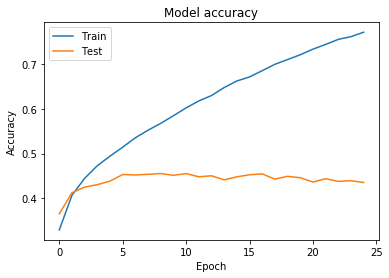

10000/10000 [==============================] - 1s 54us/step


=========== Final Model Testing ===========
Test loss: 2.3189
Test accuracy: 43.55 [%]


In [3]:
from tensorflow import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

[X_train, X_test, y_train_OH, y_test_OH] = preprocessing( X_train, X_test, y_train, y_test, rgb_2_gray = 1 )
num_classes = y_train_OH.shape[1]   # 10 classes 
[epochs, batch_size] = [25, 125]                           # execution conditions

def calculate_score( model, X, y ):
  score = model.evaluate(X, y)
  print('\n\n=========== Final Model Testing ===========')
  print(f'Test loss: {score[0] :.4f}')
  print(f'Test accuracy: {score[1]*100 :.2f} [%]')

def print_accuracy( model, history ):
  print( model.summary() )
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  # ------ display evaluation score ------ % 
  calculate_score( model, X_test, y_test_OH )

def linear_classifier( model, use_regularization ):

  if (use_regularization == 1):
    # model.add( Dense(num_classes, input_shape=(img_size,), activation='softmax', kernel_regularizer=regularizers.l2(l=0.1), activity_regularizer=regularizers.l2(l=0.1)))
    model.add( Dense(250, activation='relu', kernel_regularizer=regularizers.l2(l=0.1)) )
    model.add( Dense(100, activation='relu')) #, kernel_regularizer=regularizers.l2(l=0.0)) )
    model.add( Dense(33,  activation='relu')) #, kernel_regularizer=regularizers.l2(l=0.0)) )
    model.add( Dense(num_classes, activation='softmax') )

  else :
    # model.add( Dense(num_classes, input_shape=(img_size,), activation='softmax') )
    model.add( Dense(250, activation='relu') )
    model.add( Dense(100, activation='relu') )
    model.add( Dense(33 , activation='relu') )
    model.add( Dense(num_classes, activation='softmax') )
    
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit( X_train, y_train_OH, validation_data=(X_test, y_test_OH),
                      epochs = epochs, batch_size = batch_size)
  print_accuracy( model, history )
  return model

model = Sequential()
model = linear_classifier( model, use_regularization = 0 )

# 4. Train another linear classifier (using L2 regularization ) :

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 56us/step - loss: 4.0709 - acc: 0.2746 - val_loss: 2.0849 - val_acc: 0.2995
Epoch 2/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.0786 - acc: 0.3040 - val_loss: 2.0482 - val_acc: 0.3171
Epoch 3/25
50000/50000 [==============================] - 2s 50us/step - loss: 2.0436 - acc: 0.3187 - val_loss: 2.0210 - val_acc: 0.3333
Epoch 4/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.0142 - acc: 0.3289 - val_loss: 1.9819 - val_acc: 0.3426
Epoch 5/25
50000/50000 [==============================] - 2s 47us/step - loss: 1.9963 - acc: 0.3328 - val_loss: 1.9652 - val_acc: 0.3512
Epoch 6/25
50000/50000 [==============================] - 2s 49us/step - loss: 1.9765 - acc: 0.3393 - val_loss: 1.9808 - val_acc: 0.3358
Epoch 7/25
50000/50000 [==============================] - 2s 50us/step - loss: 1.9660 - acc: 0.3431 - val_loss: 1.9589 - val_acc

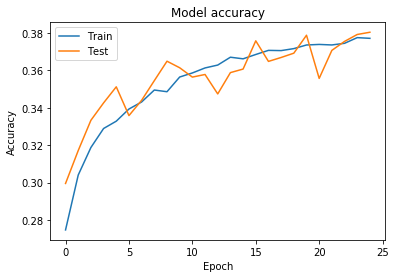

10000/10000 [==============================] - 1s 55us/step


=========== Final Model Testing ===========
Test loss: 1.8526
Test accuracy: 38.04 [%]


In [4]:
model = Sequential()
model = linear_classifier( model, use_regularization = 1 )

# 5. Train a convolutional neural network :



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 226us/step - loss: 1.6695 - acc: 0.3841 - val_loss: 1.3039 - val_acc: 0.5245
Epoch 2/25
50000/50000 [==============================] - 6s 121us/step - loss: 1.2016 - acc: 0.5696 - val_loss: 0.9896 - val_acc: 0.6489
Epoch 3/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.9918 - acc: 0.6507 - val_loss: 0.8553 - val_acc: 0.7002
Epoch 4/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.8566 - acc: 0.6994 - val_loss: 0.7673 - val_acc: 0.7330
Epoch 5/25
50000/50000 [==============================] - 6s 123us/step - loss: 0.7629 - acc: 0.7327 - val_loss: 0.7448 - val_acc: 0.7451
Epoch 6/25
50000/50000 [==============================] - 6s 122us/step - loss: 0.6921 - acc: 0.7588 - val_loss: 0.6662 - val_acc: 0.7707
Epoc

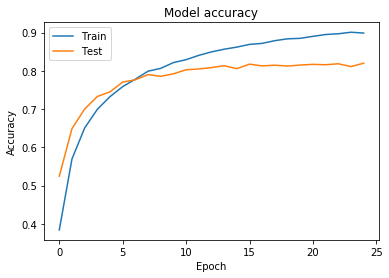

10000/10000 [==============================] - 1s 115us/step


=========== Final Model Testing ===========
Test loss: 0.6382
Test accuracy: 82.00 [%]


In [5]:
from __future__ import print_function
from keras.layers import Conv2D, MaxPooling2D, Dropout
# from keras import backend as K

[epochs, batch_size] = [25, 125]                           # execution conditions
(X_train, y_train), (X_test, y_test) = cifar10.load_data()    # upload data
[X_train, X_test, y_train_OH, y_test_OH] = preprocessing( X_train, X_test, y_train, y_test, rgb_2_gray = 0 )

# ---------- define CNN Model ---------- #
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(120, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# ------------ CNN Execution ------------ # 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_OH, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test_OH) )
print_accuracy( model, history )

# 6. Find 2 images on the web and use them as input :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2/2 [==============================] - 0s 17ms/step


=========== Final Model Testing ===========
Test loss: 0.0000
Test accuracy: 100.00 [%]


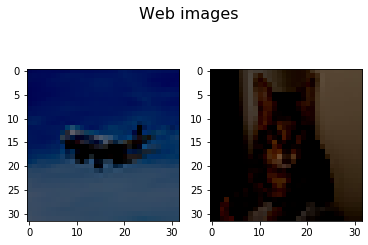

In [6]:
# from PIL import Image
import PIL
import requests
from io import BytesIO

URL = ['https://miro.medium.com/max/3027/0*kp8rJzqHjagMj22J', 
       'https://www.rd.com/wp-content/uploads/2019/11/cat-10-e1573844975155-768x519.jpg']

web_imgs = np.zeros([2, 32, 32, 3])

for i in range( len(URL) ):
  response = requests.get( URL[i] )
  img = PIL.Image.open(BytesIO(response.content))
  pic_low = img.resize((32,32), resample= PIL.Image.LANCZOS)
  web_imgs[i, :, :, :] = np.array(pic_low.getdata()).reshape(pic_low.size[0], pic_low.size[1], 3)

# preprocess new data
web_imgs = web_imgs/255.0 - 0.5

# present    new images
fig, ax_arr = plt.subplots(1, 2)
fig.suptitle('Web images', fontsize=16)
ax_arr[0].imshow( web_imgs[0, :, :, :] )
ax_arr[1].imshow( web_imgs[1, :, :, :] )

web_labels = np_utils.to_categorical([0, 3, 9]) # new images classes
web_labels = web_labels[0:2, :]
calculate_score( model, web_imgs, web_labels)

# Conclusion ::

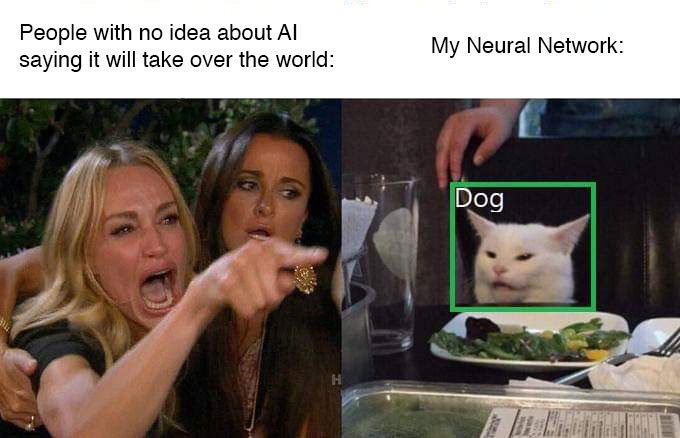

In [7]:
URL = 'https://pbs.twimg.com/media/EJrRX7-UcAAp-WR.jpg:large'

response = requests.get( URL )
PIL.Image.open(BytesIO(response.content))